In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
conn=engine.connect()

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


Text(0, 0.5, 'Inches')

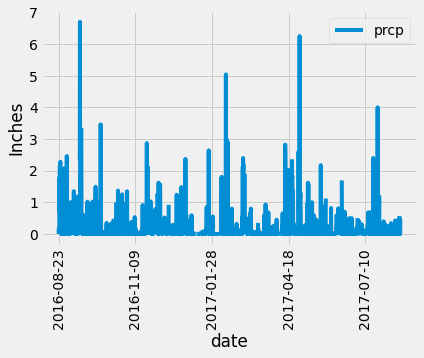

In [13]:
results=session.query(measurement .date).order_by(measurement .date.desc()).first()
results[0]
last_date = dt.datetime.strptime(results[0],"%Y-%m-%d") - dt.timedelta(days=366)
data=session.query(measurement.date,measurement.prcp).\
    filter(measurement.date > last_date).\
    order_by(measurement.date).all()
df_1=pd.DataFrame(data)
df_1=df_1.sort_values('date')
df_1=df_1.set_index('date')

df_1.plot(rot=90)
plt.ylabel('Inches')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_1['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [15]:
# Design a query to show how many stations are available in this dataset?
no_station=session.query(measurement.station).\
    group_by(measurement.station).count()
no_station

9

In [134]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active=session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).all()
df_ma=pd.DataFrame(most_active,columns=['station','count'],)
df_ma=df_ma.sort_values('count',ascending=False,ignore_index=True)
df_ma

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [135]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id=df_ma.iloc[0,0]
max_temp=session.query(func.max(measurement.tobs) ).\
    filter(measurement.station == station_id).all()

min_temp=session.query(func.min(measurement.tobs) ).\
    filter(measurement.station == station_id).all()

avg_temp=session.query(func.avg(measurement.tobs) ).\
    filter(measurement.station == station_id).all()


print(f"Highest temp",max_temp)
print(f"Lowest temp",min_temp)
print(f"Average temp",avg_temp)


Highest temp [(85.0,)]
Lowest temp [(54.0,)]
Average temp [(71.66378066378067,)]


Text(0, 0.5, 'Frequency')

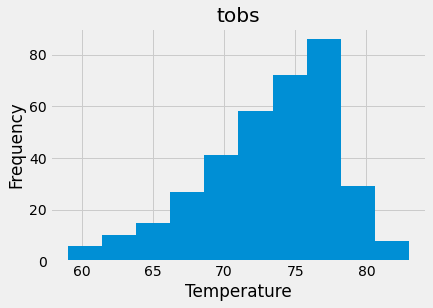

In [160]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station=session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).\
    filter(measurement.tobs != "").all()
df_st=pd.DataFrame(station,columns=['station','count'],)
df_st=df_st.sort_values('count',ascending=False,ignore_index=True)
df_st
id=df_st.iloc[0,0]
yrly_station=session.query(measurement.tobs).\
    filter(measurement.date > last_date).filter(measurement.station ==id).\
    order_by(measurement.date).all()
station_df=pd.DataFrame(yrly_station)
station_df.hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')